<a href="https://colab.research.google.com/github/Massambaagro/GIT-proj-R/blob/main/TD_apprentissage_profond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install --quiet breizhcrops geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source

In [7]:
from breizhcrops import BreizhCrops
from breizhcrops.datasets.breizhcrops import BANDS as allbands
import matplotlib.pyplot as plt
import torch
import numpy as np

In [8]:
dataset = BreizhCrops(region="belle-ile", preload_ram=True)

classmapping.csv: 8.19kB [00:00, 21.1kB/s]
belle-ile.csv: 98.3kB [00:00, 189kB/s]                            


downloading breizhcrops_dataset/2017/L1C/belle-ile.h5.tar.gz


belle-ile.h5.tar.gz: 11.1MB [00:04, 2.28MB/s]                            


extracting breizhcrops_dataset/2017/L1C/belle-ile.h5.tar.gz to breizhcrops_dataset/2017/L1C/belle-ile.h5
removing breizhcrops_dataset/2017/L1C/belle-ile.h5.tar.gz
checking integrity by file size...
ok!


codes.csv: 24.6kB [00:00, 63.9kB/s]                            
loading data into RAM: 100%|██████████| 1049/1049 [00:00<00:00, 2160.73it/s]


In [9]:
print("nombre d'obervations: ", len(dataset))
print("il y a ", dataset.nclasses, " classes : ", dataset.classes)
print("qui correspondent aux cultures suivantes : ", dataset.klassenname)
print("**** la première observation : ")
x, y, field_id = dataset[0]
print("est de taille ", x.shape)
print("sa classe, ", y)
print("et l'index de la parcelle (non utilisé ici)", field_id)

nombre d'obervations:  1049
il y a  9  classes :  [0 1 2 3 4 5 6 7 8]
qui correspondent aux cultures suivantes :  ['barley' 'wheat' 'rapeseed' 'corn' 'sunflower' 'orchards' 'nuts'
 'permanent meadows' 'temporary meadows']
**** la première observation : 
est de taille  torch.Size([45, 13])
sa classe,  tensor(7)
et l'index de la parcelle (non utilisé ici) 6059869


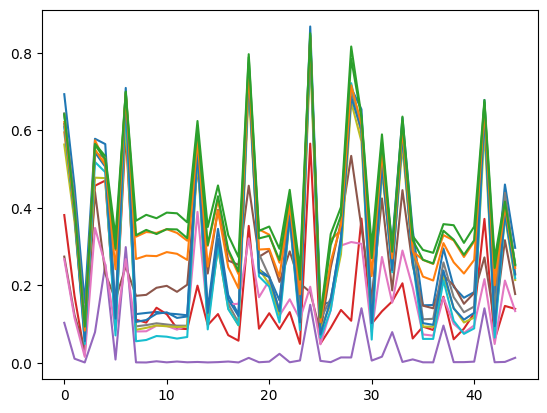

In [10]:
plt.plot(x)
plt.show()

In [32]:
X = torch.stack([dataset[i][0] for i in range(len(dataset))])
y = torch.tensor(np.array([dataset[i][1] for i in range(len(dataset))]))
print(X.shape)
ndvi = (X[:,:,10] - X[:,:,6]) / (X[:,:,10] + X[:,:,6] + 1e-8)
ndvi_mais = (X[166,:,10] - X[166,:,6]) / (X[166,:,10] + X[166,:,6] + 1e-8)
ndvi_ble = (X[249,:,10] - X[249,:,6]) / (X[249,:,10] + X[249,:,6] + 1e-8)

torch.Size([1049, 45, 13])


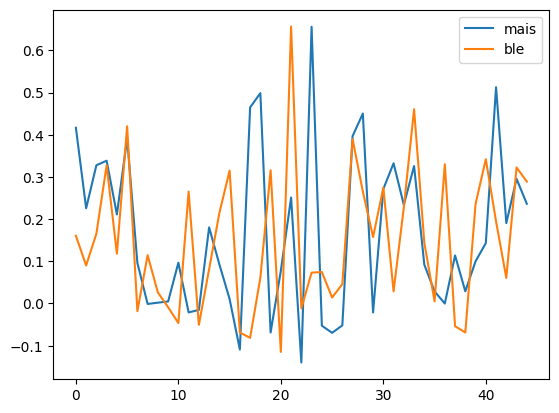

In [18]:
plt.plot(ndvi_mais, label="mais")
plt.plot(ndvi_ble, label="ble")
plt.legend()
plt.show()

In [33]:
from torch.utils.data import Dataset

class TSDataset(Dataset):
    def __init__(self, data, lab):
        self.ts = data
        self.labels = lab

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.ts[idx], self.labels[idx]

In [34]:
X_all = TSDataset(ndvi, y)

In [35]:
X_all.ts.shape, X_all.labels[:20]

(torch.Size([1049, 45]),
 tensor([7, 7, 7, 7, 5, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]))

In [30]:
print(len(y))
print(len(X_all))

1049
1049


In [36]:
from torch.utils.data import DataLoader

batch_size = len(X_all)
dataloader_all = DataLoader(X_all, batch_size=batch_size, shuffle=True)

for X, y in dataloader_all:
    print(f"Shape of X [batch size, length]: {X.shape}")
    print(len(y))
    break

Shape of X [batch size, length]: torch.Size([1049, 45])
1049


In [42]:
from torch.utils.data import DataLoader

batch_size = 128
dataloader_all = DataLoader(X_all, batch_size=batch_size, shuffle=True)

for X, y in dataloader_all:
    print(f"Shape of X [batch size, length]: {X.shape}")
    print(len(y))
    #break

Shape of X [batch size, length]: torch.Size([128, 45])
128
Shape of X [batch size, length]: torch.Size([128, 45])
128
Shape of X [batch size, length]: torch.Size([128, 45])
128
Shape of X [batch size, length]: torch.Size([128, 45])
128
Shape of X [batch size, length]: torch.Size([128, 45])
128
Shape of X [batch size, length]: torch.Size([128, 45])
128
Shape of X [batch size, length]: torch.Size([128, 45])
128
Shape of X [batch size, length]: torch.Size([128, 45])
128
Shape of X [batch size, length]: torch.Size([25, 45])
25


In [39]:
train_dataset, valid_dataset = torch.utils.data.random_split(X_all, [0.7, 0.3])

In [40]:
from torch.utils.data import DataLoader

batch_size = 64
dataloader_train = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for X, y in dataloader_all:
    print(f"Shape of X [batch size, length]: {X.shape}")
    print(len(y))
    break

Shape of X [batch size, length]: torch.Size([128, 45])
128


In [41]:
from torch.utils.data import DataLoader

batch_size = len(X_all)
dataloader_valid = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)

for X, y in dataloader_all:
    print(f"Shape of X [batch size, length]: {X.shape}")
    print(len(y))
    break

Shape of X [batch size, length]: torch.Size([128, 45])
128


In [44]:
import torch.nn as nn
import torch.nn as nn

class MLP_simple_ndvi(nn.Module):
  def __init__(self, input_size=45, output_size=9):
    super(MLP_simple_ndvi, self).__init__()
    self.fc = nn.Linear(input_size, output_size)

  def forward(self, x):
    out = self.fc(x)
    return out


  def forward(self, x):
    out = self.fc(x)
    return out

In [45]:
if 'model' in locals():
    del model
#del model #if it already exists
taille_entree = 45
taille_sortie = 9
model = MLP_simple_ndvi(input_size = taille_entree, output_size = taille_sortie)
print(model)

MLP_simple_ndvi(
  (fc): Linear(in_features=45, out_features=9, bias=True)
)


In [46]:
def train_loop(dataloader, model, loss_fn, optimizer, log=True):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X) #forward pass
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if log and batch%5==0:
            loss_, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss_:>7f}  [{current:>5d}/{size:>5d}]")
    return loss.item()

In [48]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)
train_loop(dataloader_train, model, loss, optimizer)

loss: 2.250914  [   64/  735]
loss: 1.951283  [  384/  735]
loss: 1.771947  [  704/  735]


1.652182698249817